Preparing the dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

cars_df = pd.read_csv('data/cars_after_eda.csv')

In [4]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti,Swift,Dzire VDI,140000 km - 150000 km,1200 cc - 1300 cc,20 kmpl - 25 kmpl,60 bhp - 80 bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda,Rapid,1.5 TDI Ambition,110000 km - 120000 km,1400 cc - 1500 cc,20 kmpl - 25 kmpl,100 bhp - 120 bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda,City,2017-2020 EXi,130000 km - 140000 km,1400 cc - 1500 cc,15 kmpl - 20 kmpl,60 bhp - 80 bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai,i20,Sportz Diesel,120000 km - 130000 km,1300 cc - 1400 cc,20 kmpl - 25 kmpl,80 bhp - 100 bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti,Swift,VXI BSIII,110000 km - 120000 km,1200 cc - 1300 cc,15 kmpl - 20 kmpl,80 bhp - 100 bhp


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7906 non-null   object 
 1   year            7906 non-null   int64  
 2   selling_price   7906 non-null   int64  
 3   km_driven       7906 non-null   int64  
 4   fuel            7906 non-null   object 
 5   seller_type     7906 non-null   object 
 6   transmission    7906 non-null   object 
 7   owner           7906 non-null   object 
 8   mileage_kmpl    7906 non-null   float64
 9   engine_cc       7906 non-null   int64  
 10  max_power_bhp   7906 non-null   float64
 11  seats           7906 non-null   float64
 12  brand           7906 non-null   object 
 13  model           7906 non-null   object 
 14  model_variants  7906 non-null   object 
 15  km_driven_bin   7905 non-null   object 
 16  engine_bin      7794 non-null   object 
 17  mileage_bin     7888 non-null   o

### Checking the distribution of categorical data

In [6]:

print("\nDistribution of categorical data:")

print(cars_df['fuel'].value_counts())
print(cars_df['transmission'].value_counts())
print(cars_df['seller_type'].value_counts())
print(cars_df['owner'].value_counts())
print(cars_df['brand'].value_counts())
print(cars_df['model'].value_counts())


Distribution of categorical data:
fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64
transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64
seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64
owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64
brand
Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force              

### Encoding Categorical Data:

Encoding categorical variables such as 'model', ‘fuelType’, ‘Manufacturer’, and ‘transmission’ into numerical representations, preparing the dataset for machine learning algorithms.

In [7]:
from sklearn.preprocessing import LabelEncoder
columns = ['brand', 'model', 'model_variants', 'seller_type', 'transmission', 'fuel', 'owner', 'km_driven_bin', 'engine_bin', 'mileage_bin', 'max_power_bin']

lEnc = LabelEncoder()

#encoded_labels = lEnc.fit_transform(cars_df['brand'])
#mapping_dict = dict(zip(lEnc.classes_, range(len(lEnc.classes_))))
#print(mapping_dict)


In [8]:
mappings = list()

for col in columns:
    encoded_labels = lEnc.fit_transform(cars_df[col])
    cars_df[col] = encoded_labels
    mappings.append(dict(zip(lEnc.classes_, range(len(lEnc.classes_)))))

for map_item in mappings: 
    print(map_item)

cars_df.head()
#cars_df.info()

{'Ambassador': 0, 'Ashok': 1, 'Audi': 2, 'BMW': 3, 'Chevrolet': 4, 'Daewoo': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Kia': 15, 'Land': 16, 'Lexus': 17, 'MG': 18, 'Mahindra': 19, 'Maruti': 20, 'Mercedes-Benz': 21, 'Mitsubishi': 22, 'Nissan': 23, 'Opel': 24, 'Renault': 25, 'Skoda': 26, 'Tata': 27, 'Toyota': 28, 'Volkswagen': 29, 'Volvo': 30}
{'3': 0, '5': 1, '6': 2, '7': 3, '800': 4, 'A-Star': 5, 'A3': 6, 'A4': 7, 'A6': 8, 'Accent': 9, 'Accord': 10, 'Alto': 11, 'Amaze': 12, 'Ameo': 13, 'Aria': 14, 'Aspire': 15, 'Astra': 16, 'Aveo': 17, 'Avventura': 18, 'B': 19, 'BR-V': 20, 'BRV': 21, 'Baleno': 22, 'Beat': 23, 'Bolero': 24, 'Bolt': 25, 'Brio': 26, 'CLA': 27, 'CLASSIC': 28, 'CR-V': 29, 'Camry': 30, 'Captiva': 31, 'Captur': 32, 'Celerio': 33, 'Ciaz': 34, 'City': 35, 'Civic': 36, 'Classic': 37, 'Compass': 38, 'Corolla': 39, 'Creta': 40, 'CrossPolo': 41, 'Cruze': 42, 'D-Max': 43, 'Duster': 44, 'Dzire': 45, 'E-Class'

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248,74.00,5.0,20,152,940,6,2,2,12
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0,26,126,232,3,4,2,0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497,78.00,5.0,10,35,524,5,4,1,12
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.00,1396,90.00,5.0,11,196,1463,4,3,2,13
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.10,1298,88.20,5.0,20,152,1602,3,2,1,13


In [35]:
cars_df.query("brand == 2 and model == 6 and year == 2017")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
2047,Audi A3 35 TDI Premium Plus,2017,2600000,70000,1,1,0,0,20.38,1968,143.0,5.0,2,6,559,38,8,2,2
7838,Audi A3 40 TFSI Premium,2017,1689999,8000,3,0,0,0,16.60,1798,177.5,5.0,2,6,567,0,6,1,3


In [38]:
data = cars_df.query("brand == 'Audi' and model == 'A3'")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_cc,max_power_bhp,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin


#Preparetion data splitted into test and train data subsets and applied to regression algorithms.

#Splitting the data:#

We use the train_test_split function to split the features (X) and the target variable (Y) into training and testing sets. 
The test_size parameter specifies the proportion of the dataset to include in the testing set, which is set to 0.3 (30%). 
The random_state parameter ensures reproducibility of the split.

In [21]:
from sklearn.model_selection import train_test_split

X = cars_df.drop(['name','selling_price', 'km_driven', 'engine_cc', 'mileage_kmpl', 'max_power_bhp'], axis=1)
Y = cars_df['selling_price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            7906 non-null   int64  
 1   fuel            7906 non-null   int64  
 2   seller_type     7906 non-null   int64  
 3   transmission    7906 non-null   int64  
 4   owner           7906 non-null   int64  
 5   seats           7906 non-null   float64
 6   brand           7906 non-null   int64  
 7   model           7906 non-null   int64  
 8   model_variants  7906 non-null   int64  
 9   km_driven_bin   7906 non-null   int64  
 10  engine_bin      7906 non-null   int64  
 11  mileage_bin     7906 non-null   int64  
 12  max_power_bin   7906 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 803.1 KB


In [22]:
print(X_train.columns)

Index(['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats',
       'brand', 'model', 'model_variants', 'km_driven_bin', 'engine_bin',
       'mileage_bin', 'max_power_bin'],
      dtype='object')


In [15]:
X_train.query("brand == 2 and model == 6")

,year,fuel,seller_type,transmission,owner,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
2047,2017,1,1,0,0,5.0,2,6,559,38,8,2,2
7838,2017,3,0,0,0,5.0,2,6,567,0,6,1,3


We trained 4 machine learning models, Linear Regression, Lasso Regression, RandomForest Regression,  on the training data and evaluated their performance on both training and testing sets.

We’ll train a Linear Regression model on the training data to predict car prices.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading the Linear Regression model
lRegModel = LinearRegression()

lRegModel.fit(X_train, Y_train)

#Model Evaluation (evaluate the performance of the trained Linear Regression model)
lrPredicts = lRegModel.predict(X_test)

# Calculating the R squared error
# R squared is a statistical measure of how well the regression predictions approximate the actual data points. 
# It ranges from 0 to 1, where a value closer to 1 indicates a better fit.
errorScoreLR = r2_score(Y_test, lrPredicts)
print("R squared Error LinearRegression : ", errorScoreLR)

#The calculated R squared error for the training data is approximately 0.7155

R squared Error LinearRegression :  0.5389534972021834


#Model Training: Lasso Regression

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection 
and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. 
The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

In [24]:
from sklearn.linear_model import Lasso

lassoModel = Lasso()

# Fitting the model to the training data
lassoModel.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction = lassoModel.predict(X_train)

errorScoreLasso = r2_score(Y_train, training_data_prediction)
print("R squared Error Lasso ", errorScoreLasso)

R squared Error Lasso  0.5445509480658584


In [25]:
# Prediction on testing data
lassoPredicts = lassoModel.predict(X_test)
# Calculating the R squared error for testing data
errorScoreLassoTest = r2_score(Y_test, lassoPredicts)
print("R squared Error Lasso: ", errorScoreLassoTest)

R squared Error Lasso:  0.538953825186441


#### Model Training: RandomForest Regression

The next method to build prediction models is Random forest regression method and can be used in sklearn.ensemble library with RandomForestRegressor indicator.

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfrPredicts = rfr.predict(X_test)

rfrScore = r2_score(Y_test, rfrPredicts)
rfrError = np.sqrt(mean_squared_error(Y_test, rfrPredicts))
print('R2-Score RFR ', rfrScore)
print('Error square RFR ', rfrError)
# The coefficients

R2-Score RFR  0.9761649024406551
Error square RFR  121711.64186831116


In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, rfrPredicts))
print('MSE:', metrics.mean_squared_error(Y_test, rfrPredicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rfrPredicts)))

MAE: 64925.28733719325
MSE: 14813723766.280031
RMSE: 121711.64186831116


#### Extra gradient boosting algorithm

which is one of the most used algorithms in numerical value estimation models is used. Xgboost has the implementation of this very popular algorithm and It is used in car price prediction modelling.

Machine learning algorithms that is useful for conducting classification and prediction problems.

In [28]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
xgbPredicts = xgb.predict(X_test)
xgbScore = r2_score(Y_test, xgbPredicts)
xgbError = np.sqrt(mean_squared_error(Y_test, xgbPredicts))

print("R squared Error Lasso: ", errorScoreLassoTest)
print("R squared Error LinearRegression : ", errorScoreLR)
print('R2-Score RFR ', rfrScore)
print('Error square RFR ', rfrError)
print('R2-Score XGB ', xgbScore)
print('Error square XGB ', xgbError)


R squared Error Lasso:  0.538953825186441
R squared Error LinearRegression :  0.5389534972021834
R2-Score RFR  0.9761649024406551
Error square RFR  121711.64186831116
R2-Score XGB  0.9754013560314756
Error square XGB  123645.76259266339


BaggingRegressor 

In [ ]:
from sklearn.ensemble import BaggingRegressor


bagging = BaggingRegressor()
bagging.fit(X_train, Y_train)
acc_model(11, bagging, train,test)

In [29]:
X_train.query("brand == 2 and model == 6")


,year,fuel,seller_type,transmission,owner,seats,brand,model,model_variants,km_driven_bin,engine_bin,mileage_bin,max_power_bin
2047,2017,1,1,0,0,5.0,2,6,559,38,8,2,2
7838,2017,3,0,0,0,5.0,2,6,567,0,6,1,3


In [33]:
input_data = pd.DataFrame([[2017,1,1,0,0,5.0,2,6,559,38,8,1,1]],
                                columns=['year','fuel','seller_type','transmission','owner','seats',
                                         'brand','model','model_variants',
                                         'km_driven_bin','engine_bin','mileage_bin','max_power_bin'])

result = xgb.predict(input_data)
result

array([2504589.5], dtype=float32)

We calculate the R squared error using the r2_score function from the metrics module. R squared is a statistical measure of how well the regression predictions approximate the actual data points. It ranges from 0 to 1, where a value closer to 1 indicates a better fit.

After training, R2 score and error square are listed. This R2 value shows that the model is able to predict the estimated value but has low success rate. So It can be considered to improve the dataset a bit by extracting the vehicle age from model year and since the mileage value is the numeric value, It can be standardized to more fit to the model

When comparing the random forest regression model and the Xgboost model, It can be said that the Xgboost model has better results. 
With an R2 value is 0.96. 
Accuracy level can be boosted by adding more data and completing missing values or crawling other highly correlated features such as gasoline burned per kilometer etc.

RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB

#### Visualize the relationship between the actual car prices and the prices predicted by our models, providing insights into their accuracy and generalization ability.

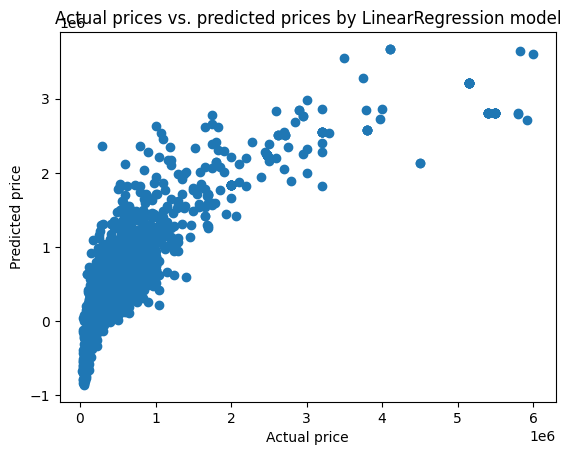

In [20]:
plt.scatter(Y_test, lrPredicts)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs. predicted prices by LinearRegression model")
plt.show()

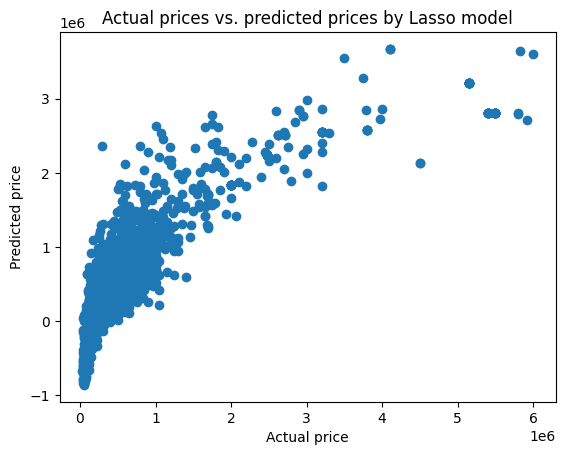

In [21]:
plt.scatter(Y_test, lassoPredicts)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs. predicted prices by Lasso model")
plt.show()

Text(0, 0.5, 'Predicted Y')

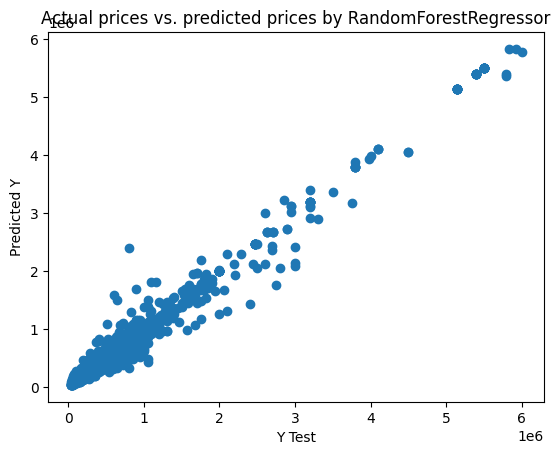

In [22]:
plt.scatter(Y_test, rfrPredicts)
plt.title('Actual prices vs. predicted prices by RandomForestRegressor')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

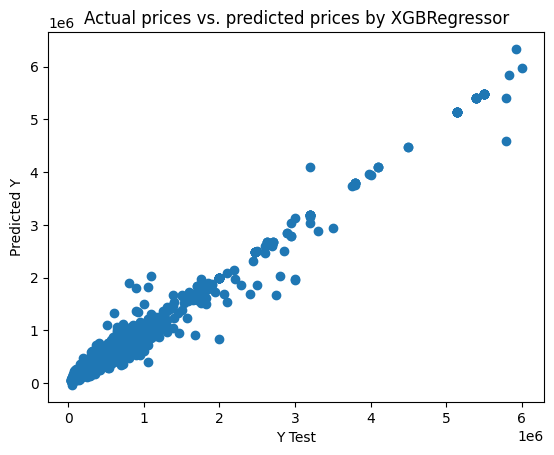

In [23]:
plt.scatter(Y_test, xgbPredicts)
plt.title('Actual prices vs. predicted prices by XGBRegressor')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<div class="alert alert-block alert-success"><b>R2-Score XGB :</b> 0.978172674000691</div>
<div class="alert alert-block alert-success"><b>R2-Score RFR:</b> 0.9789023092156874</div>
<div class="alert alert-block alert-warning"><b>R squared Error Lasso:</b> 0.6692519031024124</div>
<div class="alert alert-block alert-warning"><b>R squared Error LinearRegression:</b> 0.6692521986606419</div>